# Objective

## Social Media Tweet Analysis on Twitter Dataset
1. Topic Modeling on Twitter Dataset
2. Sentiment analysis on Twitter Dataset

***
- In previoius task I have successfully carried out the EDA and produced a clean twitter data.
- In this task I will be using the clean_tweet_data.csv generated.

### Import necessary package

In [26]:
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint
import pandas as pd
import numpy as np
from gensim import corpora
from gensim.models import CoherenceModel
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import string
import re
import os


In [5]:
sys.path.append(os.path.abspath(os.path.join("./..")))

# custom modules from Day-2
from preprocess_tweet_data import DataPreparation


### Data acquisition
- We use the clean_tweet_dataframe.csv

In [6]:
clean_tweet_df = pd.read_csv('../clean_tweet_dataframe.csv')
clean_tweet_df.head()


,created_at,source,clean_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,flattened_hashtags,flattened_user_mentions
0,2022-08-07 22:31:20+00:00,twitter for android,iameztoy extra random image let us focus one s...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,20497,2621,False,"['#city', '#ta']",['@i_ameztoy'],NaN,#City,@i_ameztoy
1,2022-08-07 22:31:16+00:00,twitter for android,indopacinfo chinas media explains military rea...,-1.000000e-01,0.100000,en,0,201,ziisq,65,272,False,"['#china', '#taiwan']",['@indopac_info'],NaN,#Ta,@IndoPac_Info
2,2022-08-07 22:31:07+00:00,twitter for android,china even cut communication anwer phonecalls ...,0.000000e+00,0.000000,en,0,0,fin21free,85,392,False,['#xijinping'],['@zelenskyyua'],netherlands,#China,@ZelenskyyUa
3,2022-08-07 22:31:06+00:00,twitter for android,putin xijinping told friend taiwan vassal stat...,1.000000e-01,0.350000,en,0,0,fin21free,85,392,False,['#xijinping'],NaN,netherlands,#Taiwan,@ChinaUncensored
4,2022-08-07 22:31:04+00:00,twitter for iphone,chinauncensored sorry thought taiwan independe...,-6.938894e-18,0.556250,en,0,381,vizzinidolores,910,2608,False,NaN,['@chinauncensored'],"ayent, schweiz",#XiJinping,@benedictrogers


## 3. Data preparation
- convert the tweet to string and lowercase
- remove punctuations 
- generate id for each words in the clean_text
- generate id and thier coressponding frequency(corpus)


In [7]:
PrepareData_obj = DataPreparation(clean_tweet_df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [8]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]
print(id_words[:2])

[[('city', 1), ('coast', 1), ('district', 1), ('extra', 1), ('focus', 1), ('gt', 1), ('iameztoy', 1), ('image', 1), ('let', 1), ('longjing', 1), ('one', 1), ('random', 1), ('specific', 1), ('ta', 1), ('taichung', 1), ('us', 1), ('western', 1), ('zone', 1)], [('area', 1), ('chinas', 1), ('drills', 1), ('explains', 1), ('indopacinfo', 1), ('labels', 1), ('media', 1), ('military', 1), ('pi', 1), ('read', 1), ('reasons', 1), ('strait', 1), ('taiwan', 1)]]


# Topic Modeling
- It is a coarse level analysis of what is in text collection
- It can be done using Latent Dirichlet Allocation
    - Distributional hypothesis
        - similar topics make use of similar words
    - Statistical mixture hypothesis
        - documents talk about several topics for which a statistical distribution can be determined.

    - The purpose of LDA is mapping each teweets in our corpus to a set of topics which covers a good deal of the words in the tweet

In [9]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)


In [10]:
pprint(lda_model.print_topics())

[(0,
  '0.056*"taiwan" + 0.034*"us" + 0.028*"pelosi" + 0.018*"williamyang" + '
  '0.018*"speaker" + 0.017*"japan" + 0.017*"china" + 0.013*"visit" + '
  '0.012*"nancy" + 0.012*"missiles"'),
 (1,
  '0.059*"taiwan" + 0.034*"military" + 0.027*"august" + 0.027*"th" + '
  '0.023*"drills" + 0.019*"around" + 0.017*"chinese" + 0.016*"china" + '
  '0.015*"indopacinfo" + 0.014*"chinas"'),
 (2,
  '0.096*"taiwan" + 0.035*"indopacinfo" + 0.031*"missile" + 0.029*"china" + '
  '0.028*"chinas" + 0.024*"island" + 0.022*"chinese" + 0.020*"good" + '
  '0.018*"launches" + 0.018*"infographic"'),
 (3,
  '0.055*"taiwan" + 0.028*"visit" + 0.021*"us" + 0.017*"pelosi" + '
  '0.016*"pelosis" + 0.013*"minister" + 0.011*"china" + 0.011*"amp" + '
  '0.010*"world" + 0.009*"people"'),
 (4,
  '0.045*"china" + 0.030*"taiwan" + 0.016*"taiwans" + '
  '0.015*"chinataiwancrisis" + 0.012*"time" + 0.011*"war" + 0.010*"dead" + '
  '0.010*"found" + 0.009*"hotel" + 0.009*"ukraine"')]


In [15]:
pprint(lda_model.show_topics(formatted=False)[:5])


[(0,
  [('taiwan', 0.0555923),
   ('us', 0.034303848),
   ('pelosi', 0.028204605),
   ('williamyang', 0.018428097),
   ('speaker', 0.018077305),
   ('japan', 0.017096419),
   ('china', 0.016585924),
   ('visit', 0.012710853),
   ('nancy', 0.012443848),
   ('missiles', 0.012273723)]),
 (1,
  [('taiwan', 0.05896451),
   ('military', 0.03448148),
   ('august', 0.027414095),
   ('th', 0.027223792),
   ('drills', 0.022572277),
   ('around', 0.01892496),
   ('chinese', 0.016558755),
   ('china', 0.01599165),
   ('indopacinfo', 0.015062982),
   ('chinas', 0.014279024)]),
 (2,
  [('taiwan', 0.09621709),
   ('indopacinfo', 0.03499091),
   ('missile', 0.030841574),
   ('china', 0.029437792),
   ('chinas', 0.027946968),
   ('island', 0.023950044),
   ('chinese', 0.022234691),
   ('good', 0.02025329),
   ('launches', 0.017746868),
   ('infographic', 0.01754495)]),
 (3,
  [('taiwan', 0.055233322),
   ('visit', 0.028310405),
   ('us', 0.020889722),
   ('pelosi', 0.016807389),
   ('pelosis', 0.015857

In [16]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)



Perplexity:  -8.16721597515503

 Ldamodel Coherence Score/Accuracy on Tweets:  0.2870320038526215


In [18]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared


/Users/user/miniforge3/envs/10A/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/user/miniforge3/envs/10A/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/user/miniforge3/envs/10A/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/user/miniforge3/envs/10A/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for r

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.191647  0.299852       1        1  23.861188
3      0.178772 -0.184823       2        1  21.616761
2     -0.211726  0.017493       3        1  21.333146
1     -0.248261  0.026200       4        1  19.575051
0      0.089568 -0.158722       5        1  13.613853, topic_info=                 Term         Freq        Total Category  logprob  loglift
138           missile  1902.000000  1902.000000  Default  30.0000  30.0000
25           military  2555.000000  2555.000000  Default  29.0000  29.0000
22        indopacinfo  3043.000000  3043.000000  Default  28.0000  28.0000
15                 us  3082.000000  3082.000000  Default  27.0000  27.0000
139                th  1545.000000  1545.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
114             visit   500.179307  2269.754605   Topic5  -4.3653   0.4816
34              china   652.665571  7153.834688   Topic5  -4.0992  -0.4003
3190  epochtimeschina   229.866512   578.859328   Topic5  -5.1428   1.0705
106           chinese   245.263028  2553.612876   Topic5  -5.0779  -0.3489
279             world   203.740686   811.027099   Topic5  -5.2634   0.6126

[239 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3266      2  0.997484          abs
214       4  0.998855          air
328       4  0.998429     aircraft
193       4  0.998073      america
1173      3  0.997305         amid
...     ...       ...          ...
348       5  0.789073  williamyang
2438      5  0.993529       within
279       2  0.748434        world
279       5  0.251533        world
7678      5  0.992763  wrongdoings

[240 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

# Sentiment Analysis
- create score from the polarity
- use the score as target value
- Building a Sentiment Classifier using Scikit-Learn

In [19]:
clean_tweet_data_score = PrepareData_obj.create_score(clean_tweet_df)
clean_tweet_data_score.columns

Index(['created_at', 'source', 'clean_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place', 'flattened_hashtags',
       'flattened_user_mentions', 'score'],
      dtype='object')

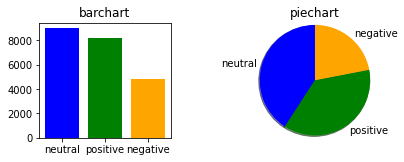

In [20]:
#barchart
# .plot(kind='bar')
sentiment_count = clean_tweet_data_score['score'].value_counts()
keys = list(sentiment_count.keys())
counts = [item for key, item in sentiment_count.items()]

fig, ax = plt.subplots(1, 2)

ax[0].bar(keys, counts, tick_label=keys,
          width=0.8, color=['blue', 'green', 'orange'])
ax[0].set_title('barchart')

ax[1].pie(counts, labels=keys,
          startangle=90,
          shadow=True,
          colors=['blue', 'green', 'orange'],
          radius=1.2)
ax[1].set_title('piechart')
plt.subplots_adjust(left=0.2, right=0.99,
                    bottom=0.2, top=0.6,
                    wspace=0.6, hspace=0.4)


<AxesSubplot:ylabel='score'>

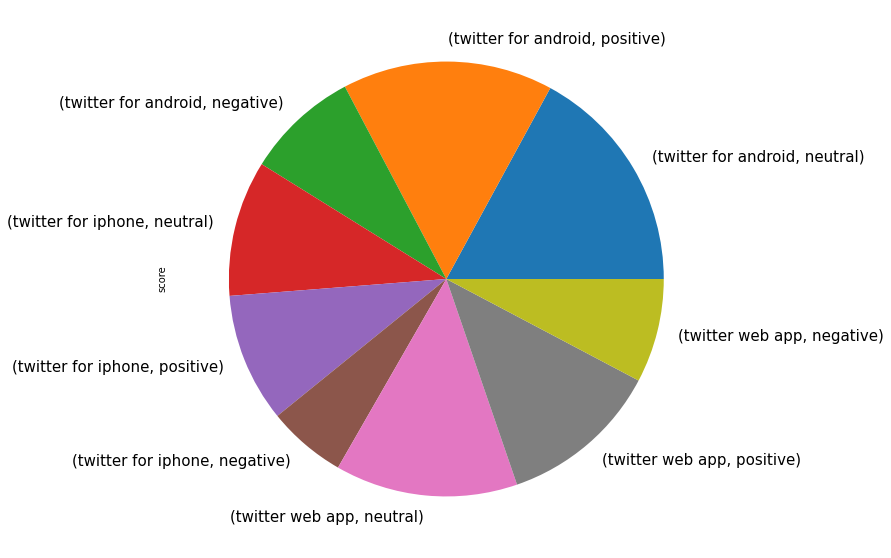

In [22]:
common_source = clean_tweet_df[clean_tweet_df['source'].isin(['twitter for android',
                                                                  'twitter web app',
                                                                  'twitter for iphone'])]
common_source.groupby('source')['score'].value_counts().plot.pie(
    figsize=(12, 10), fontsize=15)

# additonal preprocess 
- Convert the score value to class 1 or 0
    - Remove rows where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲 = 0 or 𝐬𝐜𝐨𝐫𝐞  = Neutral
    - reset the frame index.

    - Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column

    - Create feature and target variables (X,y) from  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  columns respectively.

    - Use train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)

    - Build an SGDClassifier model from the vectorize train text data. Use CountVectorizer() with a  trigram  parameter.
    - Evaluate your model on the test data.


In [24]:
clean_tweet_data_scoremap = PrepareData_obj.create_scoremap(
    clean_tweet_data_score)
clean_tweet_data_scoremap.columns

Index(['created_at', 'source', 'clean_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place', 'flattened_hashtags',
       'flattened_user_mentions', 'score', 'scoremap'],
      dtype='object')

In [32]:
clean_tweet_data_scoremap['scoremap'].head()

0    0
1    0
3    1
4    0
5    1
Name: scoremap, dtype: int64

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
X, y = np.array(clean_tweet_data_scoremap['clean_text'],
                dtype='unicode'), clean_tweet_data_scoremap['scoremap']
vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(X)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = SGDClassifier(max_iter=1000, tol=1e-3)
model = clf.fit(X_train, y_train)


- evaluate the model performance using score wich is classification accuracy

In [31]:
model.score(X_test,y_test)

0.930384167636787